In [138]:
import numpy as np
import pandas as pd

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [140]:
raw_data=pd.read_csv('train.csv')
raw_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [141]:
numerical_columns=raw_data.describe().columns    ### for now we use numerical data

In [142]:
raw_data_targets=raw_data['SalePrice']

In [168]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def predict_metrics (model,x,y_true):
    y_pred=model.predict(x)
    mae= mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    
    return mae,mse,r2

## 1. Visualization

First of all we have to check which features to use as there are countless columns and i am surely most of them will be reduntant as they will not add any usefulness to the model.For that, we can employ couple of techniques:

1. Intitution based selection ( We can check which features are normally important as seen by various house owners)

2. We can select some features from heatmap by checking the ones having most high correlation with target (Sale Price) Variable

3. We can then add few features by combining similar ones or drop one of the similar ones

4. Then we can move on to check the conditions for Regression which are 1) Linearity 2) No Homoscedacsity 3) No Multicollinearity 4) Normality of dependent variable 

All of this will be done by using visualization techniques coupled with statistical methods

In [144]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

For now based on intution i can select:

LotFrontage, LotArea, Utilities, OverallQual (this includes consition1,condition2) , YearBuilt, BsmtCond, GarageArea, PoolArea

This is my first selection , further during our analysis we will select some more and drop some of these too.

In [145]:
Selection_1=['LotFrontage','LotArea','Utilities','OverallQual','YearBuilt','BsmtCond','GarageArea','PoolArea']

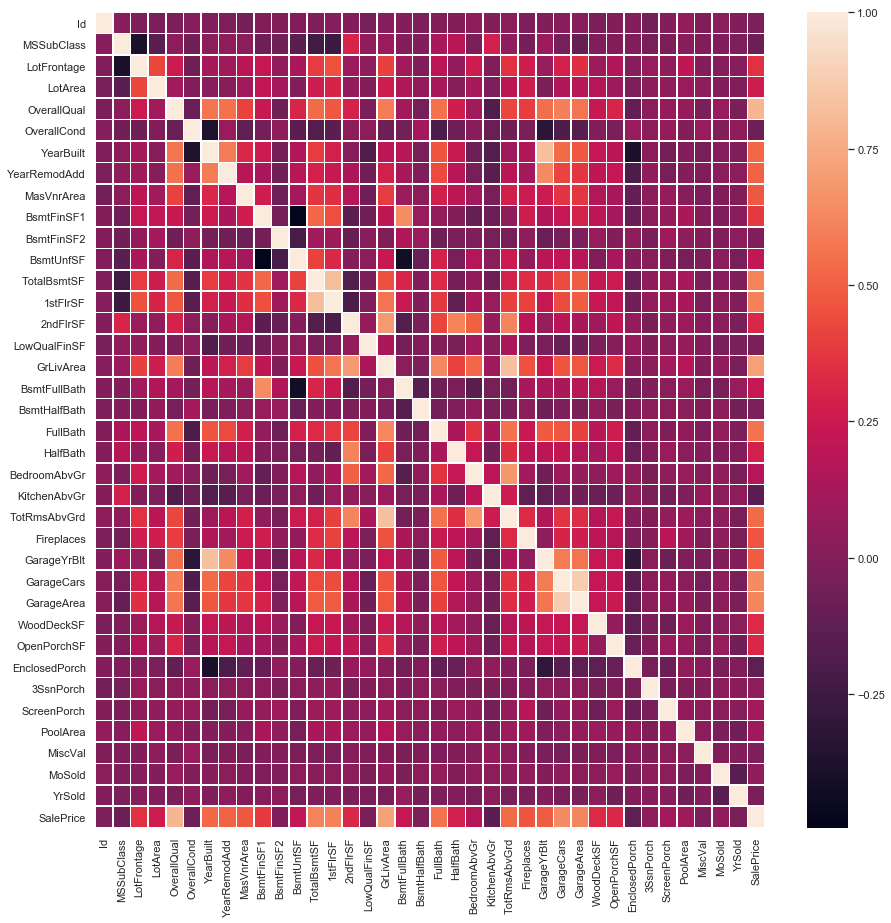

In [146]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(raw_data.corr(),linewidth=.5,ax=ax)

From this heatmap we can select few features:

Highest negative Correlation : KitchenAbvGr

Highest Positive Correlation : OverallQual, GarageCars,GarageArea, GrLivArea

In [147]:
Selection_2=['KitchenAbvGr','OverallQual','GarageArea','GrLivArea']   ### Becuase garage cars and garage area are same

In [148]:
Fetaures_List=Selection_1 + Selection_2

In [149]:
Fetaures_List.remove('OverallQual')    ### It was twice in the list

In [150]:
Fetaures_List

['LotFrontage',
 'LotArea',
 'Utilities',
 'YearBuilt',
 'BsmtCond',
 'GarageArea',
 'PoolArea',
 'KitchenAbvGr',
 'OverallQual',
 'GarageArea',
 'GrLivArea']

Let's check their correlation with SalePrice

In [151]:
raw_data[Fetaures_List + ['SalePrice']].corr()

LotFrontage   LotArea  YearBuilt  GarageArea  PoolArea  \
LotFrontage      1.000000  0.426095   0.123349    0.344997  0.206167   
LotArea          0.426095  1.000000   0.014228    0.180403  0.077672   
YearBuilt        0.123349  0.014228   1.000000    0.478954  0.004950   
GarageArea       0.344997  0.180403   0.478954    1.000000  0.061047   
PoolArea         0.206167  0.077672   0.004950    0.061047  1.000000   
KitchenAbvGr    -0.006069 -0.017784  -0.174800   -0.064433 -0.014525   
OverallQual      0.251646  0.105806   0.572323    0.562022  0.065166   
GarageArea       0.344997  0.180403   0.478954    1.000000  0.061047   
GrLivArea        0.402797  0.263116   0.199010    0.468997  0.170205   
SalePrice        0.351799  0.263843   0.522897    0.623431  0.092404   

              KitchenAbvGr  OverallQual  GarageArea  GrLivArea  SalePrice  
LotFrontage      -0.006069     0.251646    0.344997   0.402797   0.351799  
LotArea          -0.017784     0.105806    0.180403   0.263116   0.263843  
YearBuilt        -0.174800     0.572323    0.478954   0.199010   0.522897  
GarageArea       -0.064433     0.562022    1.000000   0.468997   0.623431  
PoolArea         -0.014525     0.065166    0.061047   0.170205   0.092404  
KitchenAbvGr      1.000000    -0.183882   -0.064433   0.100063  -0.135907  
OverallQual      -0.183882     1.000000    0.562022   0.593007   0.790982  
GarageArea       -0.064433     0.562022    1.000000   0.468997   0.623431  
GrLivArea         0.100063     0.593007    0.468997   1.000000   0.708624  
SalePrice        -0.135907     0.790982    0.623431   0.708624   1.000000

We can see that PoolArea has almost no correlation with the SalePrice so we are gonna drop it. KitchenAbvGr is also close to zero but among all the features it is the most neagtive so we are gonna keep it.

In [152]:
Fetaures_List.remove('PoolArea')

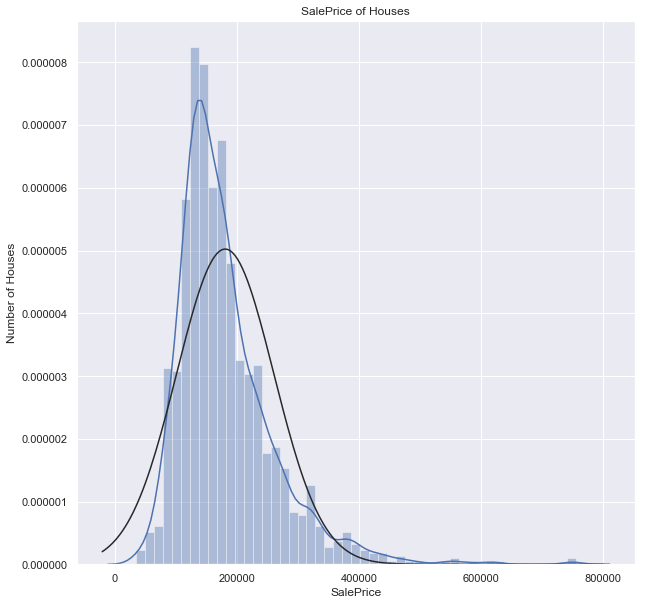

In [153]:
from scipy.stats import norm
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
ax.set_title('SalePrice of Houses')# Give the plot a main title
ax.set_xlabel('Price Rannge') # Set text for the x axis
ax.set_ylabel('Number of Houses')# Set text for y-axis
sns.distplot(raw_data['SalePrice'],ax=ax,fit=norm)

In [154]:
from scipy.stats import kurtosis
print("Skew:",raw_data['SalePrice'].skew(),
      "Kurtosis:",raw_data['SalePrice'].kurtosis())

Skew: 1.8828757597682129 Kurtosis: 6.536281860064529


So as also shown from above figure it has a right(positive) skew which is confirmed by the number and kurtosis which is the measure of tails show that it has thinner tails.A kurtosis of  Standard Normal Distribution is 3.So we shall employ a technique to change it to normal distribution

In [155]:
raw_data['SalePrice']= np.log(raw_data['SalePrice'])   ### The log or sqroot of positive numbers remove positive skew

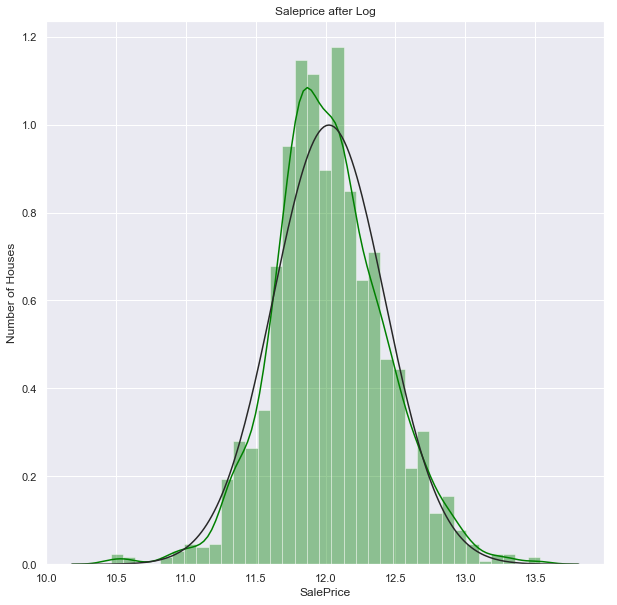

In [156]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('Saleprice after Log')
ax.set_xlabel('ln(SalePrice)')
ax.set_ylabel('Number of Houses')
sns.distplot(raw_data['SalePrice'],ax=ax,fit=norm,color='green')

Now let's check the homoscedasticity of the variables and also spot some outliers as they tend to disturb regression results

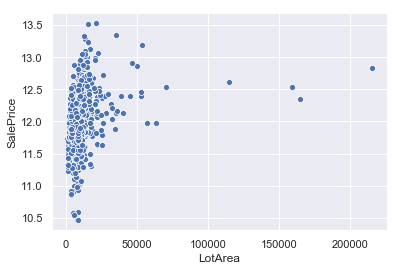

In [157]:
sns.scatterplot(y=raw_data['SalePrice'],x=raw_data['LotArea'])

We can see that LotArea > 100,000 are just outliers so we can remove them. Also data is not in cone or diamond shape so there is no homoscedasticity.

In [125]:
for i in range (raw_data.shape[0]):
    if raw_data['LotArea'][i] > 100000:
        raw_data.drop(index=i,inplace=True)

In [126]:
raw_data[Fetaures_List].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 10 columns):
LotFrontage     1200 non-null float64
LotArea         1456 non-null int64
Utilities       1456 non-null object
YearBuilt       1456 non-null int64
BsmtCond        1419 non-null object
GarageArea      1456 non-null int64
KitchenAbvGr    1456 non-null int64
OverallQual     1456 non-null int64
GarageArea      1456 non-null int64
GrLivArea       1456 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 165.1+ KB


In [158]:
raw_data_targets=raw_data['SalePrice']

### Data Preprocessing and Modelling

In [159]:
var=raw_data['LotFrontage'].median()
raw_data['LotFrontage'].fillna(value=var,inplace=True)

In [160]:
raw_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [161]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
raw_data_1=encoder.fit_transform(raw_data['Utilities'])

In [162]:
raw_data['Utilities']=raw_data_1

In [163]:
raw_data_2=pd.get_dummies(raw_data['BsmtCond'],dummy_na=True)

In [164]:
raw_data['BsmtCond']=raw_data_2

### 1. Base Model, Multivariate Regression

In [165]:
train_X=raw_data[Fetaures_List].values
train_Y=raw_data_targets.values

In [166]:
from sklearn.linear_model import LinearRegression
Linear_multivariate=LinearRegression()
Linear_multivariate.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
predict_metrics(Linear_multivariate,train_X,train_Y)   ### MAE,MSE and R2 values

(0.1173657714773588, 0.02976456245013877, 0.8133327398385024)

### Ridge Regression

We should check for VIF score > 5 to see if there is any multicollinearity there.And then apply ridge regression.
For VIF score, use statsmodels library

In [180]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1)
ridge_reg.fit(train_X,train_Y)
predict_metrics(ridge_reg,train_X,train_Y)

(0.11737726257340755, 0.02976467389388458, 0.8133320409235183)

The result are almost same so let's check with Lasso regression

### Lasso Regression

In [179]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(train_X,train_Y)
predict_metrics(lasso_reg,train_X,train_Y)

(0.12010381625896899, 0.03068074274019215, 0.8075869518785845)

By far the linear simple regression has better results so we are going to predict through that model

What my reading is that:

1) we might be using some extra variables so we have to check R-squared for every extra varaiable and then use the minimum viable number of features